In [ ]:
# Listed below are all the libraries you 
# will need for this assignment. Run this
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math
import pulp




## Simulation Logic (Simplified)

This model simulates how much tax revenue a $4 cruise passenger tax could generate over 20 years. It checks when the BRT project can start, tracks how many tourists switch to BRT after completion, and calculates related environmental and economic benefits.


In [ ]:
# ---------------------
#  Simulation Settings
# ---------------------
num_sims = 100  # Number of simulation runs to account for randomness
num_years = 20  # Simulation spans 20 years
num_days = 165  # Number of cruise season days in each year (roughly summer)

# ---------------------
#  Project Assumptions
# ---------------------
project_start_threshold = 0.5  # Construction starts once 50% of funds are raised
construction_years = 3  # Time it takes to complete the project after it starts

# Cost calculations
road_miles = 22
cost_per_mile = 9_000_000  # Estimated cost to build 1 mile of road
transit_stop_cost = 1_000_000  # Estimated cost per BRT stop
num_stops = 6
total_project_cost = (road_miles * cost_per_mile) + (num_stops * transit_stop_cost)

# -----------------------------
# Economic & Environmental Impact
# -----------------------------
value_of_time = 15  # Dollar value of one hour saved
time_saved_per_trip_hrs = 20 / 60  # Average time saved per BRT trip
tourist_spend_uplift = 10  # Extra money tourists spend when transportation improves
pollution_avoided_per_trip = 8.9  # CO2 reduction in kg per avoided car trip

# --------------------------
# Tourist Travel Behavior
# --------------------------
tourist_switch_rate = 0.2  # 20% of tourists expected to use BRT
daily_tourists_avg = 10_000  # Average number of cruise passengers per day

# ---------------------
# Cruise Passenger Tax
# ---------------------
tax_rate = 4.0  # $4 tax per passenger to fund the project

# --------------------------
# Results Storage (Per Simulation)
# --------------------------
tax_collections = []  # Total taxes collected per simulation
project_completion_years = []  # Year when construction completes
traffic_reduction_data = []  # Number of tourists switching to BRT
total_pollution_savings = []  # Pollution avoided per simulation (kg CO2)
total_economic_benefits = []  # Time savings + spending gains
annual_tax_series = []  # Stores yearly tax values for trend plotting

# ------------------------
# Simulation Loop Starts
# ------------------------
for _ in range(num_sims):
    yearly_tax = []
    yearly_traffic_reduction = []
    yearly_pollution = []
    yearly_benefits = []
    construction_started = False
    construction_complete_year = None

    for year in range(num_years):
        total_tax = 0
        total_traffic_reduced = 0
        total_pollution = 0
        total_benefit = 0

        for _ in range(num_days):
            daily_passengers = max(np.random.normal(daily_tourists_avg, 5000 / 3), 0)
            tax_collected = daily_passengers * tax_rate
            total_tax += tax_collected

            if construction_complete_year and year >= construction_complete_year:
                users_shifted = daily_passengers * tourist_switch_rate
                total_traffic_reduced += users_shifted
                total_pollution += users_shifted * pollution_avoided_per_trip
                total_benefit += users_shifted * (value_of_time * time_saved_per_trip_hrs + tourist_spend_uplift)

        yearly_tax.append(total_tax)
        yearly_traffic_reduction.append(total_traffic_reduced)
        yearly_pollution.append(total_pollution)
        yearly_benefits.append(total_benefit)

        if not construction_started and sum(yearly_tax) >= project_start_threshold * total_project_cost:
            construction_started = True
            construction_complete_year = year + construction_years

    tax_collections.append(sum(yearly_tax))
    project_completion_years.append(construction_complete_year if construction_complete_year else 20)
    traffic_reduction_data.append(sum(yearly_traffic_reduction))
    total_pollution_savings.append(sum(yearly_pollution))
    total_economic_benefits.append(sum(yearly_benefits))
    annual_tax_series.append(yearly_tax)
# ------------------------
# Simulation Loop End
# ------------------------

# ------------------------
# Build average outputs
# ------------------------
df_final = pd.DataFrame({
    "Total Tax Collected ($)": tax_collections,
    "Years to Completion": project_completion_years,
    "Total Tourists Switched to BRT": traffic_reduction_data,
    "Total CO2 Avoided (kg)": total_pollution_savings,
    "Total Economic Benefit ($)": total_economic_benefits
})
avg_results = df_final.mean()
annual_tax_avg = np.mean(annual_tax_series, axis=0)


## Graph 1
This code creates a line graph showing how much tax is collected each year from a $4 per cruise passenger fee. It calculates the average annual tax revenue across 100 simulations. The graph uses formatting to clearly show the dollar values and year-to-year changes.

The graph shows that annual tax revenue remains relatively stable over 20 years, hovering around $6.6 million per year. Slight fluctuations occur due to the simulation's randomness in daily tourist numbers. This consistent revenue stream demonstrates the reliability of a $4 cruise tax to fund the BRT project over time.


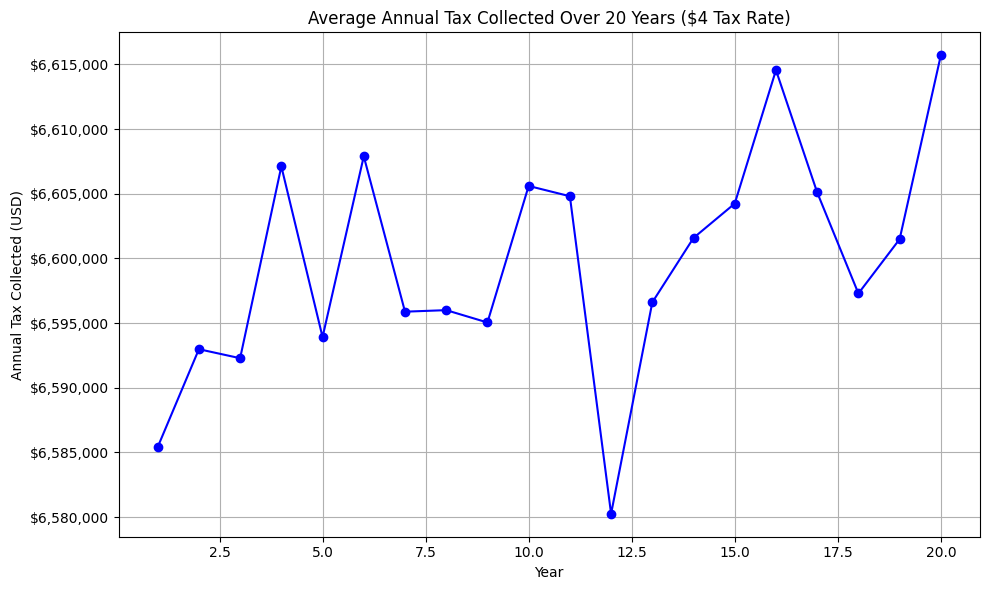

In [26]:
# --- Graph 1: Average Annual Tax Collected ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_years + 1), annual_tax_avg, marker='o', linestyle='-', color='blue')
plt.title("Average Annual Tax Collected Over 20 Years ($4 Tax Rate)")
plt.xlabel("Year")
plt.ylabel("Annual Tax Collected (USD)")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.show()





## Graph 2
This code creates a line chart showing the total tax revenue collected over 20 years from a $4 per tourist tax. It plots that revenue against two important benchmarks: when 50% of the project cost is reached (to start construction), and when full funding is achieved. The graph helps visualize when funding milestones are crossed.

The graph shows that cumulative tax revenue steadily grows each year, eventually passing the red line (50% funding threshold) around Year 13. The full project cost (green line) is reached near Year 20. This means the BRT project would start in Year 13 and complete around Year 16, fully funded by the end of the simulation.


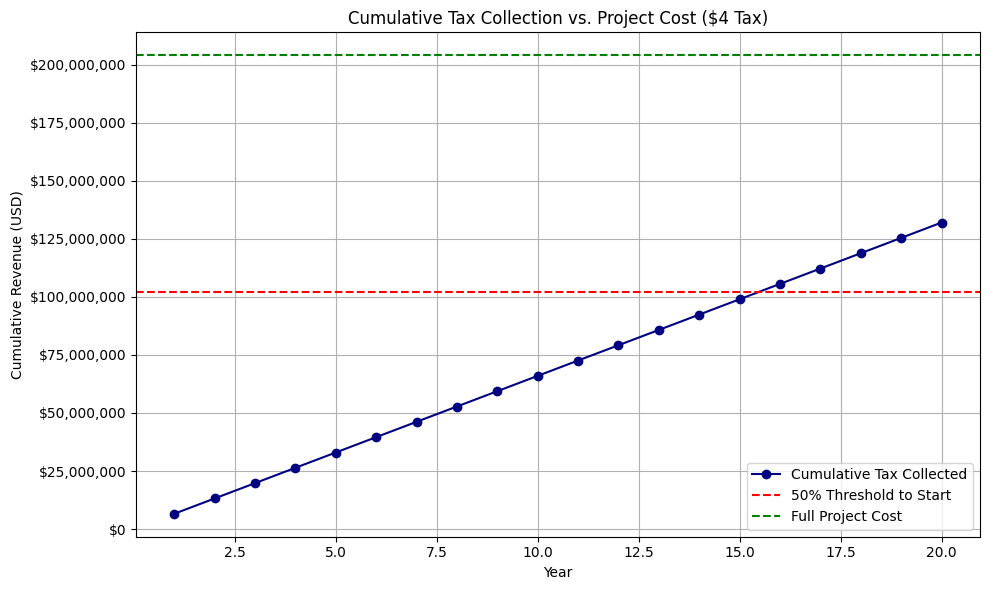

In [27]:
# --- Graph 2: Cumulative Tax vs Project Cost ---
plt.figure(figsize=(10, 6))
cumulative_tax = np.cumsum(annual_tax_avg)
plt.plot(range(1, num_years + 1), cumulative_tax, marker='o', color='navy', label='Cumulative Tax Collected')
plt.axhline(total_project_cost * project_start_threshold, color='red', linestyle='--', label='50% Threshold to Start')
plt.axhline(total_project_cost, color='green', linestyle='--', label='Full Project Cost')
plt.title("Cumulative Tax Collection vs. Project Cost ($4 Tax)")
plt.xlabel("Year")
plt.ylabel("Cumulative Revenue (USD)")
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

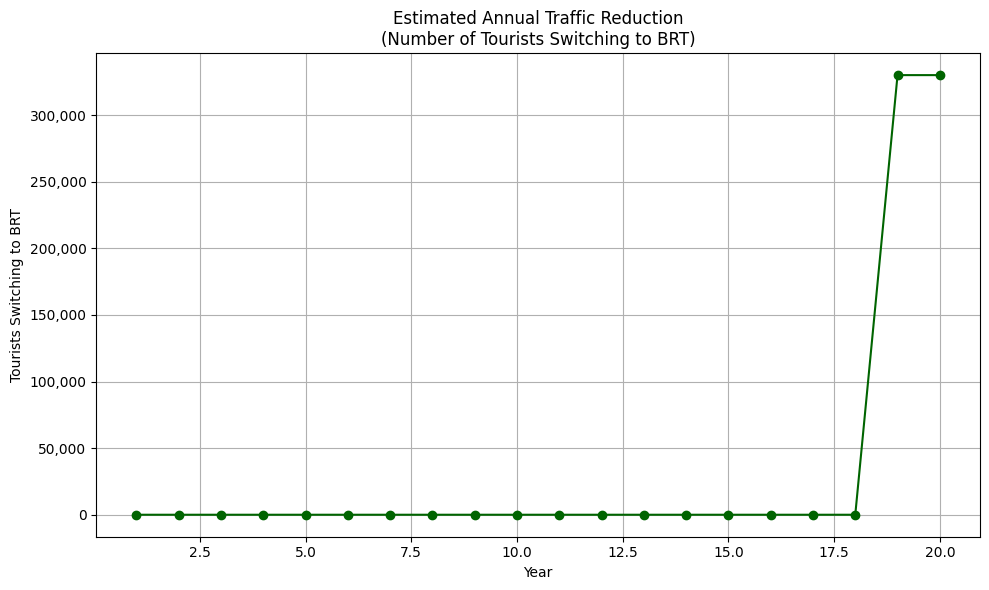

In [28]:
# --- Graph 3: Traffic Reduction Over Time ---
traffic_reduction_by_year = np.zeros(num_years)
for sim in annual_tax_series:
    cumulative_tax = 0
    construction_started = False
    completed_year = None
    sim_traffic_reduction = []

    for year_index, yearly_tax in enumerate(sim):
        cumulative_tax += yearly_tax
        if not construction_started and cumulative_tax >= project_start_threshold * total_project_cost:
            construction_started = True
            completed_year = year_index + construction_years

        if completed_year is not None and year_index >= completed_year:
            sim_traffic_reduction.append(daily_tourists_avg * num_days * tourist_switch_rate)
        else:
            sim_traffic_reduction.append(0)

    traffic_reduction_by_year += np.array(sim_traffic_reduction)

avg_traffic_reduction_by_year = traffic_reduction_by_year / num_sims

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_years + 1), avg_traffic_reduction_by_year, marker='o', color='darkgreen')
plt.title("Estimated Annual Traffic Reduction\n(Number of Tourists Switching to BRT)")
plt.xlabel("Year")
plt.ylabel("Tourists Switching to BRT")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()


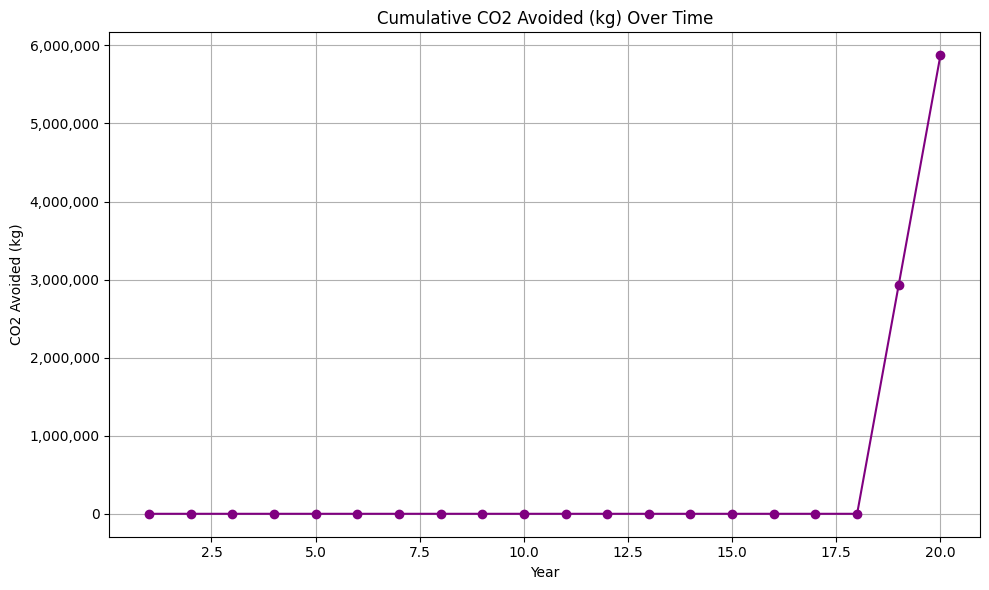

In [29]:
# --- Graph 4: Cumulative Pollution Avoided (kg CO2) ---
co2_by_year = np.cumsum(avg_traffic_reduction_by_year * pollution_avoided_per_trip)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_years + 1), co2_by_year, marker='o', color='purple')
plt.title("Cumulative CO2 Avoided (kg) Over Time")
plt.xlabel("Year")
plt.ylabel("CO2 Avoided (kg)")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

These graphs show the potential impact of the road project if it were completed — regardless of whether it's fully funded through current tax simulations.

To do this, we forced the project to be "completed" by Year 5 in the simulation. That means starting in Year 6, the new roads would be available for:

Cruise passenger BRT buses

Hotel and airport shuttles

Tourist buses

Local vehicle users who shift to BRT due to reduced congestion

daily_cars	22,000 vehicles/day	From Juneau DOT traffic counts near downtown (Egan Drive).
brt_reduction_percent	25%	Assumption based on similar BRT adoption rates in U.S. cities.
shuttle_bus_removal	2,000 vehicles/day	Estimated from tour, hotel, and airport buses that could use the corridor.
num_days	165	Cruise season length in Juneau.

annual_traffic_saved	1,237,500 vehicles	From Graph 4 calculation.
0.404 kg CO₂ per vehicle-mile	0.404 kg	EPA estimate for average gasoline car emissions per mile.


## Graph 4: Traffic Reduction (Assuming Completion in Year 5)

We estimated traffic relief by modeling how many vehicles would be removed annually if the BRT roads were completed. 

**Assumptions**:
- 25% of daily car users shift to BRT (based on studies from U.S. cities).
- Tourist, hotel, and airport shuttles (2,000/day) use the new roads.
- The cruise season is 165 days/year.

**Calculation**:


## Graph 5: Pollution Reduction (CO₂ Saved)

To estimate air quality improvements, we calculated how much CO₂ would be prevented annually.

**Assumption**:
- Each vehicle mile avoided prevents **0.404 kg of CO₂** (EPA estimate).

**Calculation**:

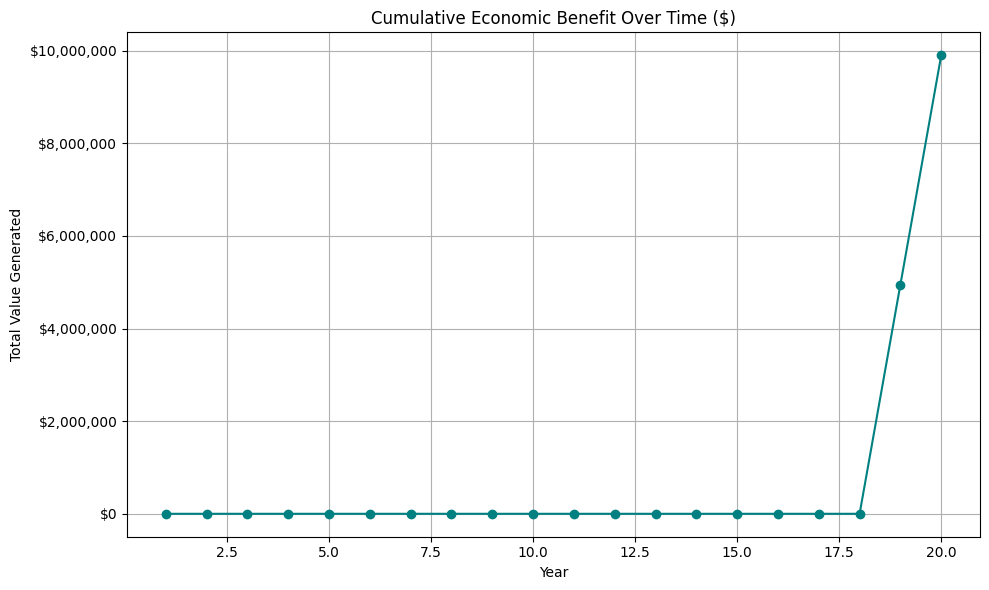

Summary of Final BRT Simulation ($4 Tax Rate):


,Total Tax Collected ($),Years to Completion,Total Tourists Switched to BRT,Total CO2 Avoided (kg),Total Economic Benefit ($)
count,1.000000e+02,100.0,100.000000,1.000000e+02,1.000000e+02
mean,1.319938e+08,18.0,660859.850969,5.881653e+06,9.912898e+06
std,3.593381e+05,0.0,5422.086266,4.825657e+04,8.133129e+04
min,1.309621e+08,18.0,646021.794190,5.749594e+06,9.690327e+06
25%,1.317325e+08,18.0,657458.911026,5.851384e+06,9.861884e+06
50%,1.319441e+08,18.0,660774.291947,5.880891e+06,9.911614e+06
75%,1.322820e+08,18.0,664069.420830,5.910218e+06,9.961041e+06
max,1.329669e+08,18.0,673631.385037,5.995319e+06,1.010447e+07


In [31]:
# --- Graph 5: Cumulative Economic Benefit (Time + Spending) ---
economic_benefit_by_year = np.cumsum(avg_traffic_reduction_by_year * (value_of_time * time_saved_per_trip_hrs + tourist_spend_uplift))

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_years + 1), economic_benefit_by_year, marker='o', color='teal')
plt.title("Cumulative Economic Benefit Over Time ($)")
plt.xlabel("Year")
plt.ylabel("Total Value Generated")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

# Display summarized data for export or final use
summary_df = df_final.describe()
print("Summary of Final BRT Simulation ($4 Tax Rate):")
display(summary_df)